In [42]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import gaussian_kde
import seaborn as sns

import pandas as pd

We the histogram of the simulated neurons

In [30]:
all_simulate = pd.read_csv("./output/simulation_n_neurons_100000_max_time_50000_n_paths_100_final_step_kde_all")["0"]
individual_simulate = pd.read_csv("./output/simulation_n_neurons_100000_max_time_50000_n_paths_100_final_step_kde_individual").iloc[:,1:]

In [31]:
individual_simulate

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.497902e-140,2.315408e-127,0.0,2.033096e-18,5.155456e-21,0.0,0.000000e+00,0.0,0.0,0.0,...,0.000000e+00,2.777997e-09,5.380162e-27,0.0,0.0,0.0,0.0,0.0,1.825792e-188,0.0
1,6.623518e-138,4.945518e-125,0.0,7.232319e-18,2.092760e-20,0.0,0.000000e+00,0.0,0.0,0.0,...,0.000000e+00,5.385216e-09,2.973197e-26,0.0,0.0,0.0,0.0,0.0,2.302741e-185,0.0
2,2.759347e-135,1.003636e-122,0.0,2.508901e-17,8.278365e-20,0.0,0.000000e+00,0.0,0.0,0.0,...,0.000000e+00,1.024145e-08,1.597478e-25,0.0,0.0,0.0,0.0,0.0,2.733699e-182,0.0
3,1.083020e-132,1.935181e-120,0.0,8.487418e-17,3.191115e-19,0.0,0.000000e+00,0.0,0.0,0.0,...,0.000000e+00,1.910837e-08,8.345124e-25,0.0,0.0,0.0,0.0,0.0,3.054696e-179,0.0
4,4.004783e-130,3.545251e-118,0.0,2.799976e-16,1.198708e-18,0.0,0.000000e+00,0.0,0.0,0.0,...,0.000000e+00,3.497903e-08,4.238586e-24,0.0,0.0,0.0,0.0,0.0,3.212899e-176,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.295643e-67,1.457870e-46,0.0,1.157831e-08,1.485722e-09,0.0,1.449236e-287,0.0,0.0,0.0,...,1.736080e-187,6.408614e-05,1.460041e-10,0.0,0.0,0.0,0.0,0.0,2.185096e-58,0.0
496,1.927377e-69,6.004629e-48,0.0,5.577488e-09,6.516378e-10,0.0,5.215565e-293,0.0,0.0,0.0,...,2.126737e-191,4.546180e-05,5.786222e-11,0.0,0.0,0.0,0.0,0.0,4.324084e-60,0.0
497,2.701322e-71,2.349819e-49,0.0,2.620684e-09,2.786624e-10,0.0,1.666189e-298,0.0,0.0,0.0,...,2.369248e-195,3.170836e-05,2.229655e-11,0.0,0.0,0.0,0.0,0.0,8.054332e-62,0.0
498,3.567088e-73,8.737019e-51,0.0,1.201030e-09,1.161820e-10,0.0,4.725067e-304,0.0,0.0,0.0,...,2.400270e-199,2.173810e-05,8.353799e-12,0.0,0.0,0.0,0.0,0.0,1.412136e-63,0.0


(0.0, 15.0)

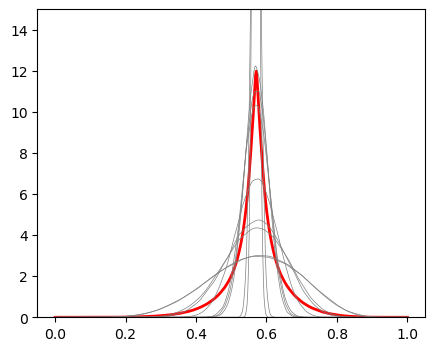

In [32]:
fig, ax = plt.subplots(figsize=(5,4))

positions = np.linspace(0.,1.,num=500)
ax.plot(positions, all_simulate, color='red', linewidth=2)

for path in range(10):
    ax.plot(positions, individual_simulate[str(path)], color='grey', linewidth=.5)

ax.set_ylim([0,15])

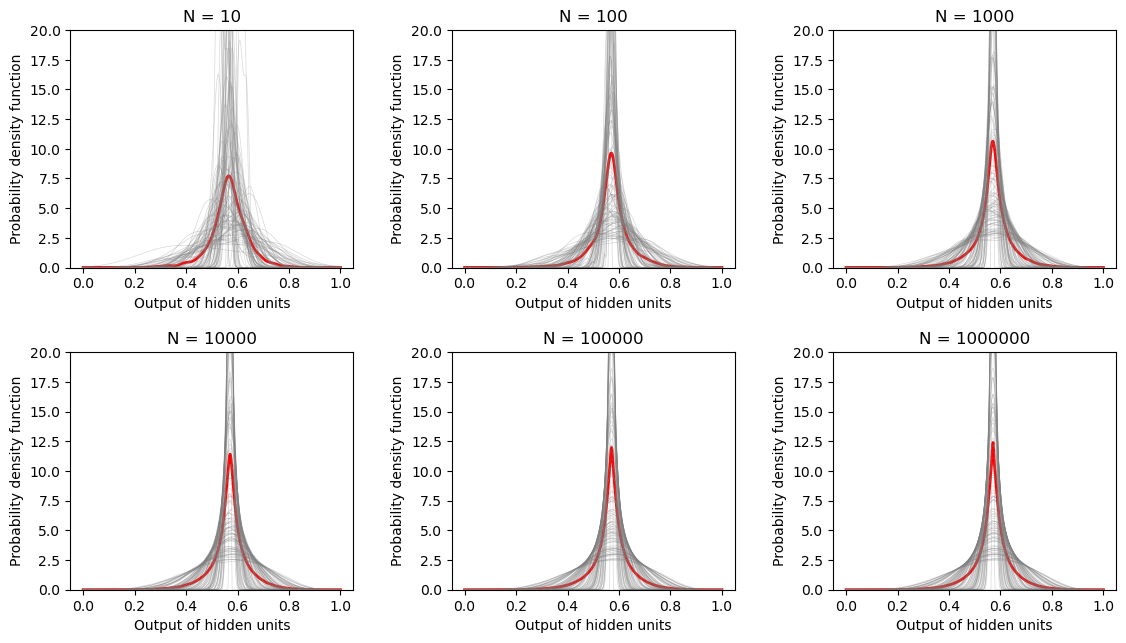

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,7))

fig.tight_layout(pad=4)
n_neurons_arr = np.array([10,100,1000,10000,100000,1000000])
idx_arr = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
positions = np.linspace(0.,1.,num=500)

for i in range(6):
    idx = idx_arr[i]
    n_neurons = n_neurons_arr[i]

    all_simulate = pd.read_csv(f"./output/simulation_n_neurons_{n_neurons}_max_time_50000_n_paths_100_final_step_kde_all")["0"]
    individual_simulate = pd.read_csv(f"./output/simulation_n_neurons_{n_neurons}_max_time_50000_n_paths_100_final_step_kde_individual").iloc[:,1:]

    ax[idx].plot(positions, all_simulate, color='red', linewidth=2)

    for path in range(100):
        ax[idx].plot(positions, individual_simulate[str(path)], color='grey', linewidth=.5, alpha=.3)
    
    ax[idx].set_ylim([0,20])
    ax[idx].set_xlabel("Output of hidden units")
    ax[idx].set_ylabel("Probability density function")
    # ax[idx].legend(["Overall", "Individual"])
    ax[idx].set_title(f"N = {n_neurons}")

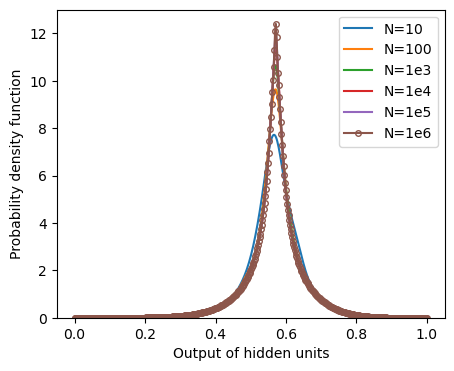

In [60]:
fig, ax = plt.subplots(figsize=(5,4))

n_neurons_arr = np.array([10,100,1000,10000,100000,1000000])

for i in range(6):
    n_neurons = n_neurons_arr[i]
    all_simulate = pd.read_csv(f"./output/simulation_n_neurons_{n_neurons}_max_time_50000_n_paths_100_final_step_kde_all")["0"]
    
    if i < 5:
        ax.plot(positions, all_simulate)
    else:
        ax.plot(positions, all_simulate, marker='o', markersize=4, markerfacecolor='none')

    ax.set_ylim([0,13])
    ax.legend(["N=10", "N=100", "N=1e3", "N=1e4", "N=1e5", "N=1e6"])
    ax.set_xlabel("Output of hidden units")
    ax.set_ylabel("Probability density function")
    # ax.set_title(f"memories at step = 49999")